In [1]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.8/978.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="oMwWp1a5SObWIq3f84aL")
project = rf.workspace("traffic-management-wxhga").project("emergency_dataset")
version = project.version(4)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 124.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to emergency_dataset-4 in yolov8:: 100%|██████████| 9962/9962 [00:01<00:00, 6160.27it/s]


100%|██████████| 21.5M/21.5M [00:00<00:00, 110MB/s] 



image 1/1 /content/images.jpg: 480x640 1 car, 71.2ms
Speed: 9.2ms preprocess, 71.2ms inference, 400.7ms postprocess per image at shape (1, 3, 480, 640)
Detected: car, Confidence: 0.93


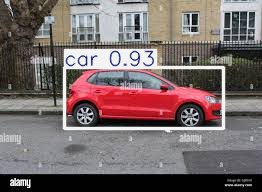

In [4]:
from ultralytics import YOLO

# Load the model
model = YOLO('yolov8s.pt')

# Run inference
results = model('/content/images.jpg')

# Extract boxes and filter by class
for result in results:
    for box in result.boxes:
        if int(box.cls.item()) in [2, 5, 7]:  # Car, Bus, Truck
            print(f"Detected: {result.names[int(box.cls.item())]}, Confidence: {box.conf.item():.2f}")

    # Show results for the current image
    result.show()


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Predections**


image 1/1 /content/LKQWZEARURAYADMLO6FB7W7FAE.jpg: 384x640 1 PoliceCar, 11.4ms
Speed: 2.4ms preprocess, 11.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
🚨 Emergency detections: []


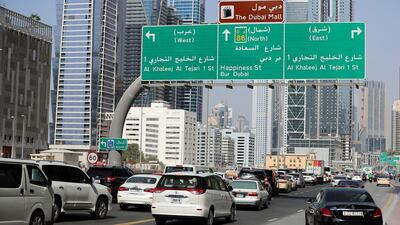


image 1/1 /content/LKQWZEARURAYADMLO6FB7W7FAE.jpg: 384x640 15 cars, 11.4ms
Speed: 1.6ms preprocess, 11.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
🚦 Congestion level: HIGH (13 vehicles detected)
⚠️ Green light extended due to congestion.
🚦 Final Signal Timing: Green: 45s, Yellow: 5s, Red: 20s


In [41]:
import time
from ultralytics import YOLO
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load YOLO models
emergency_model = YOLO("/content/yolov8s_trained.pt")  # Custom emergency vehicle model
traffic_model = YOLO("yolov8s.pt")  # Pretrained general vehicle model

# Class categories
EMERGENCY_CLASSES = ["AmbulanceOn", "FireEngineOn", "PoliceCar"]
WARNING_CLASSES = ["AmbulanceOff", "FireEngineOff"]
CONGESTION_CLASSES = ["car", "truck", "bus"]
CONGESTION_THRESHOLD = 10

# Traffic signal durations (in seconds)
NORMAL_GREEN = 30
NORMAL_YELLOW = 5
NORMAL_RED = 30

def detect_objects(model, image_path, conf_threshold=0.6):
    """Detect and return [(class_name, conf)], and a filtered image with only high-confidence boxes."""
    results = model(image_path)
    filtered_detections = []
    image = cv2.imread(image_path)

    for result in results:
        names = result.names
        for box in result.boxes:
            conf = float(box.conf.item())
            class_id = int(box.cls.item())
            class_name = names[class_id]

            if conf >= conf_threshold:
                # Save valid detection
                filtered_detections.append((class_name, conf))

                # Draw bounding box manually (filtering by conf)
                xyxy = box.xyxy[0].cpu().numpy().astype(int)
                label = f"{class_name} {conf:.2f}"

                cv2.rectangle(image, (xyxy[0], xyxy[1]), (xyxy[2], xyxy[3]), (0, 255, 0), 2)
                cv2.putText(image, label, (xyxy[0], xyxy[1] - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return filtered_detections, image

def adjust_traffic_light(congestion_count=0, emergency_detected=False):
    if emergency_detected:
        return 60, NORMAL_YELLOW, NORMAL_RED // 2
    elif congestion_count >= CONGESTION_THRESHOLD:
        return 45, NORMAL_YELLOW, NORMAL_RED - 10
    else:
        return NORMAL_GREEN, NORMAL_YELLOW, NORMAL_RED

def main(image_path):
    """Main logic for emergency and congestion-based traffic signal adjustment."""
    emergency_detections, vis_image = detect_objects(emergency_model, image_path, conf_threshold=0.6)
    print("🚨 Emergency detections:", emergency_detections)

    if any(cls in WARNING_CLASSES for cls, _ in emergency_detections):
        print("⚠️ Emergency vehicle detected but with lights OFF (no priority applied).")

    emergency_detected = any(cls in EMERGENCY_CLASSES for cls, _ in emergency_detections)

    # Show the image with high-confidence detections only
    cv2_imshow(vis_image)

    if emergency_detected:
        green, yellow, red = adjust_traffic_light(emergency_detected=True)
        print("🚨 Emergency vehicle detected! Ignoring congestion. Giving priority signal.")
        print(f"🚦 Signal Timing: Green: {green}s, Yellow: {yellow}s, Red: {red}s")
    else:
        traffic_detections, _ = detect_objects(traffic_model, image_path, conf_threshold=0.3)
        congestion_count = sum(1 for cls, _ in traffic_detections if cls in CONGESTION_CLASSES)

        green, yellow, red = adjust_traffic_light(congestion_count=congestion_count)

        if congestion_count >= CONGESTION_THRESHOLD:
            print(f"🚦 Congestion level: HIGH ({congestion_count} vehicles detected)")
            print("⚠️ Green light extended due to congestion.")
        else:
            print(f"🚦 Congestion level: LOW ({congestion_count} vehicles detected)")
            print("✅ Normal traffic conditions.")
        print(f"🚦 Final Signal Timing: Green: {green}s, Yellow: {yellow}s, Red: {red}s")

# Run it
if __name__ == "__main__":
    test_image = "/content/LKQWZEARURAYADMLO6FB7W7FAE.jpg"  # Update this to your image path
    main(test_image)



image 1/1 /content/accidents-with-emergency-vehicles.webp: 416x640 1 AmbulanceOff, 1 AmbulanceOn, 13.9ms
Speed: 6.2ms preprocess, 13.9ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 640)
🚨 Emergency detections: [('AmbulanceOn', 0.6526426672935486)]


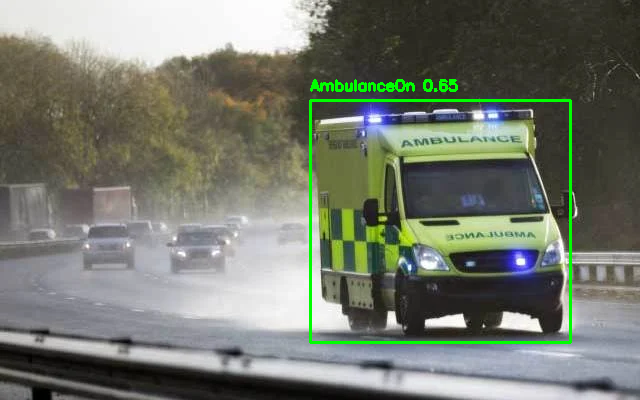

🚨 Emergency vehicle detected! Ignoring congestion. Giving priority signal.
🚦 Signal Timing: Green: 60s, Yellow: 5s, Red: 15s


In [42]:
import time
from ultralytics import YOLO
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load YOLO models
emergency_model = YOLO("/content/yolov8s_trained.pt")  # Custom emergency vehicle model
traffic_model = YOLO("yolov8s.pt")  # Pretrained general vehicle model

# Class categories
EMERGENCY_CLASSES = ["AmbulanceOn", "FireEngineOn", "PoliceCar"]
WARNING_CLASSES = ["AmbulanceOff", "FireEngineOff"]
CONGESTION_CLASSES = ["car", "truck", "bus"]
CONGESTION_THRESHOLD = 10

# Traffic signal durations (in seconds)
NORMAL_GREEN = 30
NORMAL_YELLOW = 5
NORMAL_RED = 30

def detect_objects(model, image_path, conf_threshold=0.6):
    """Detect and return [(class_name, conf)], and a filtered image with only high-confidence boxes."""
    results = model(image_path)
    filtered_detections = []
    image = cv2.imread(image_path)

    for result in results:
        names = result.names
        for box in result.boxes:
            conf = float(box.conf.item())
            class_id = int(box.cls.item())
            class_name = names[class_id]

            if conf >= conf_threshold:
                # Save valid detection
                filtered_detections.append((class_name, conf))

                # Draw bounding box manually (filtering by conf)
                xyxy = box.xyxy[0].cpu().numpy().astype(int)
                label = f"{class_name} {conf:.2f}"

                cv2.rectangle(image, (xyxy[0], xyxy[1]), (xyxy[2], xyxy[3]), (0, 255, 0), 2)
                cv2.putText(image, label, (xyxy[0], xyxy[1] - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return filtered_detections, image

def adjust_traffic_light(congestion_count=0, emergency_detected=False):
    if emergency_detected:
        return 60, NORMAL_YELLOW, NORMAL_RED // 2
    elif congestion_count >= CONGESTION_THRESHOLD:
        return 45, NORMAL_YELLOW, NORMAL_RED - 10
    else:
        return NORMAL_GREEN, NORMAL_YELLOW, NORMAL_RED

def main(image_path):
    """Main logic for emergency and congestion-based traffic signal adjustment."""
    emergency_detections, vis_image = detect_objects(emergency_model, image_path, conf_threshold=0.6)
    print("🚨 Emergency detections:", emergency_detections)

    if any(cls in WARNING_CLASSES for cls, _ in emergency_detections):
        print("⚠️ Emergency vehicle detected but with lights OFF (no priority applied).")

    emergency_detected = any(cls in EMERGENCY_CLASSES for cls, _ in emergency_detections)

    # Show the image with high-confidence detections only
    cv2_imshow(vis_image)

    if emergency_detected:
        green, yellow, red = adjust_traffic_light(emergency_detected=True)
        print("🚨 Emergency vehicle detected! Ignoring congestion. Giving priority signal.")
        print(f"🚦 Signal Timing: Green: {green}s, Yellow: {yellow}s, Red: {red}s")
    else:
        traffic_detections, _ = detect_objects(traffic_model, image_path, conf_threshold=0.3)
        congestion_count = sum(1 for cls, _ in traffic_detections if cls in CONGESTION_CLASSES)

        green, yellow, red = adjust_traffic_light(congestion_count=congestion_count)

        if congestion_count >= CONGESTION_THRESHOLD:
            print(f"🚦 Congestion level: HIGH ({congestion_count} vehicles detected)")
            print("⚠️ Green light extended due to congestion.")
        else:
            print(f"🚦 Congestion level: LOW ({congestion_count} vehicles detected)")
            print("✅ Normal traffic conditions.")
        print(f"🚦 Final Signal Timing: Green: {green}s, Yellow: {yellow}s, Red: {red}s")

# Run it
if __name__ == "__main__":
    test_image = "/content/accidents-with-emergency-vehicles.webp"  # Update this to your image path
    main(test_image)



image 1/1 /content/1699075843610 (2).jpg: 384x640 1 AmbulanceOff, 11.3ms
Speed: 2.6ms preprocess, 11.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
🚨 Emergency detections: [('AmbulanceOff', 0.6203393340110779)]
⚠️ Emergency vehicle detected but with lights OFF (no priority applied).


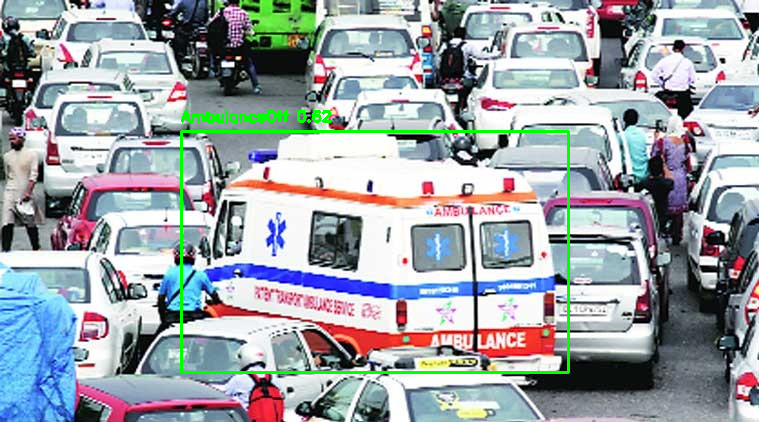


image 1/1 /content/1699075843610 (2).jpg: 384x640 7 persons, 27 cars, 1 motorcycle, 1 bus, 1 truck, 1 handbag, 14.2ms
Speed: 1.8ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
🚦 Congestion level: HIGH (26 vehicles detected)
⚠️ Green light extended due to congestion.
🚦 Final Signal Timing: Green: 45s, Yellow: 5s, Red: 20s


In [43]:
import time
from ultralytics import YOLO
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load YOLO models
emergency_model = YOLO("/content/yolov8s_trained.pt")  # Custom emergency vehicle model
traffic_model = YOLO("yolov8s.pt")  # Pretrained general vehicle model

# Class categories
EMERGENCY_CLASSES = ["AmbulanceOn", "FireEngineOn", "PoliceCar"]
WARNING_CLASSES = ["AmbulanceOff", "FireEngineOff"]
CONGESTION_CLASSES = ["car", "truck", "bus"]
CONGESTION_THRESHOLD = 10

# Traffic signal durations (in seconds)
NORMAL_GREEN = 30
NORMAL_YELLOW = 5
NORMAL_RED = 30

def detect_objects(model, image_path, conf_threshold=0.6):
    """Detect and return [(class_name, conf)], and a filtered image with only high-confidence boxes."""
    results = model(image_path)
    filtered_detections = []
    image = cv2.imread(image_path)

    for result in results:
        names = result.names
        for box in result.boxes:
            conf = float(box.conf.item())
            class_id = int(box.cls.item())
            class_name = names[class_id]

            if conf >= conf_threshold:
                # Save valid detection
                filtered_detections.append((class_name, conf))

                # Draw bounding box manually (filtering by conf)
                xyxy = box.xyxy[0].cpu().numpy().astype(int)
                label = f"{class_name} {conf:.2f}"

                cv2.rectangle(image, (xyxy[0], xyxy[1]), (xyxy[2], xyxy[3]), (0, 255, 0), 2)
                cv2.putText(image, label, (xyxy[0], xyxy[1] - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return filtered_detections, image

def adjust_traffic_light(congestion_count=0, emergency_detected=False):
    if emergency_detected:
        return 60, NORMAL_YELLOW, NORMAL_RED // 2
    elif congestion_count >= CONGESTION_THRESHOLD:
        return 45, NORMAL_YELLOW, NORMAL_RED - 10
    else:
        return NORMAL_GREEN, NORMAL_YELLOW, NORMAL_RED

def main(image_path):
    """Main logic for emergency and congestion-based traffic signal adjustment."""
    emergency_detections, vis_image = detect_objects(emergency_model, image_path, conf_threshold=0.6)
    print("🚨 Emergency detections:", emergency_detections)

    if any(cls in WARNING_CLASSES for cls, _ in emergency_detections):
        print("⚠️ Emergency vehicle detected but with lights OFF (no priority applied).")

    emergency_detected = any(cls in EMERGENCY_CLASSES for cls, _ in emergency_detections)

    # Show the image with high-confidence detections only
    cv2_imshow(vis_image)

    if emergency_detected:
        green, yellow, red = adjust_traffic_light(emergency_detected=True)
        print("🚨 Emergency vehicle detected! Ignoring congestion. Giving priority signal.")
        print(f"🚦 Signal Timing: Green: {green}s, Yellow: {yellow}s, Red: {red}s")
    else:
        traffic_detections, _ = detect_objects(traffic_model, image_path, conf_threshold=0.3)
        congestion_count = sum(1 for cls, _ in traffic_detections if cls in CONGESTION_CLASSES)

        green, yellow, red = adjust_traffic_light(congestion_count=congestion_count)

        if congestion_count >= CONGESTION_THRESHOLD:
            print(f"🚦 Congestion level: HIGH ({congestion_count} vehicles detected)")
            print("⚠️ Green light extended due to congestion.")
        else:
            print(f"🚦 Congestion level: LOW ({congestion_count} vehicles detected)")
            print("✅ Normal traffic conditions.")
        print(f"🚦 Final Signal Timing: Green: {green}s, Yellow: {yellow}s, Red: {red}s")

# Run it
if __name__ == "__main__":
    test_image = "/content/1699075843610 (2).jpg"  # Update this to your image path
    main(test_image)



image 1/1 /content/1140-cars-on-highway.jpg: 384x640 3 AmbulanceOffs, 1 PoliceCar, 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
🚨 Emergency detections: []


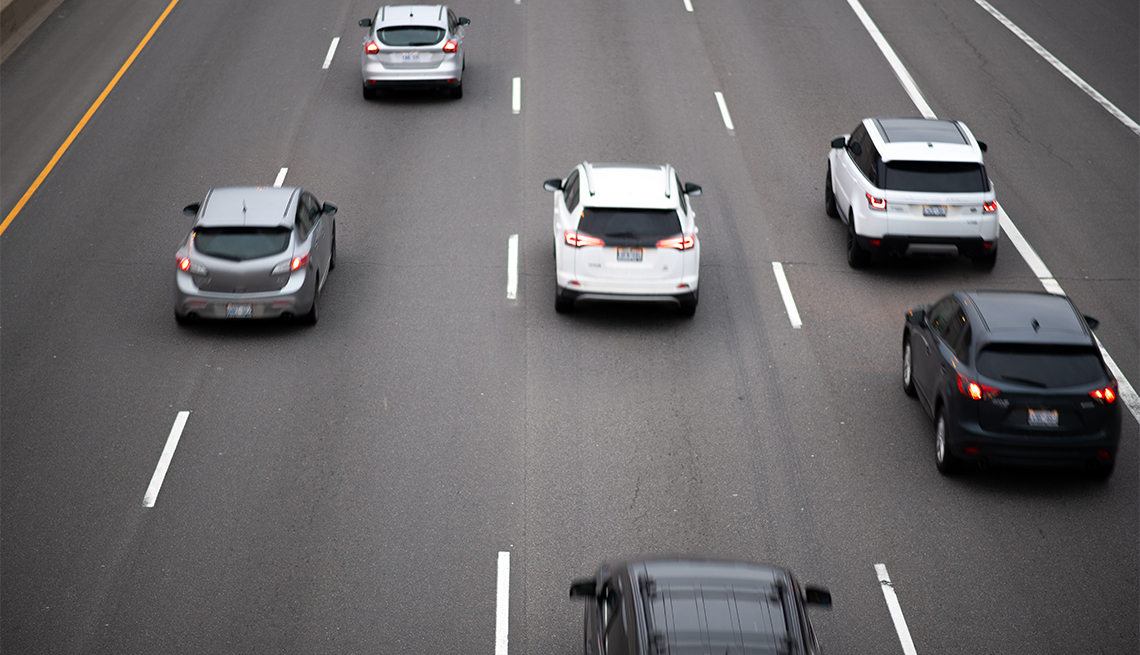


image 1/1 /content/1140-cars-on-highway.jpg: 384x640 6 cars, 11.5ms
Speed: 2.2ms preprocess, 11.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
🚦 Congestion level: LOW (6 vehicles detected)
✅ Normal traffic conditions.
🚦 Final Signal Timing: Green: 30s, Yellow: 5s, Red: 30s


In [44]:
import time
from ultralytics import YOLO
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load YOLO models
emergency_model = YOLO("/content/yolov8s_trained.pt")  # Custom emergency vehicle model
traffic_model = YOLO("yolov8s.pt")  # Pretrained general vehicle model

# Class categories
EMERGENCY_CLASSES = ["AmbulanceOn", "FireEngineOn", "PoliceCar"]
WARNING_CLASSES = ["AmbulanceOff", "FireEngineOff"]
CONGESTION_CLASSES = ["car", "truck", "bus"]
CONGESTION_THRESHOLD = 10

# Traffic signal durations (in seconds)
NORMAL_GREEN = 30
NORMAL_YELLOW = 5
NORMAL_RED = 30

def detect_objects(model, image_path, conf_threshold=0.6):
    """Detect and return [(class_name, conf)], and a filtered image with only high-confidence boxes."""
    results = model(image_path)
    filtered_detections = []
    image = cv2.imread(image_path)

    for result in results:
        names = result.names
        for box in result.boxes:
            conf = float(box.conf.item())
            class_id = int(box.cls.item())
            class_name = names[class_id]

            if conf >= conf_threshold:
                # Save valid detection
                filtered_detections.append((class_name, conf))

                # Draw bounding box manually (filtering by conf)
                xyxy = box.xyxy[0].cpu().numpy().astype(int)
                label = f"{class_name} {conf:.2f}"

                cv2.rectangle(image, (xyxy[0], xyxy[1]), (xyxy[2], xyxy[3]), (0, 255, 0), 2)
                cv2.putText(image, label, (xyxy[0], xyxy[1] - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return filtered_detections, image

def adjust_traffic_light(congestion_count=0, emergency_detected=False):
    if emergency_detected:
        return 60, NORMAL_YELLOW, NORMAL_RED // 2
    elif congestion_count >= CONGESTION_THRESHOLD:
        return 45, NORMAL_YELLOW, NORMAL_RED - 10
    else:
        return NORMAL_GREEN, NORMAL_YELLOW, NORMAL_RED

def main(image_path):
    """Main logic for emergency and congestion-based traffic signal adjustment."""
    emergency_detections, vis_image = detect_objects(emergency_model, image_path, conf_threshold=0.6)
    print("🚨 Emergency detections:", emergency_detections)

    if any(cls in WARNING_CLASSES for cls, _ in emergency_detections):
        print("⚠️ Emergency vehicle detected but with lights OFF (no priority applied).")

    emergency_detected = any(cls in EMERGENCY_CLASSES for cls, _ in emergency_detections)

    # Show the image with high-confidence detections only
    cv2_imshow(vis_image)

    if emergency_detected:
        green, yellow, red = adjust_traffic_light(emergency_detected=True)
        print("🚨 Emergency vehicle detected! Ignoring congestion. Giving priority signal.")
        print(f"🚦 Signal Timing: Green: {green}s, Yellow: {yellow}s, Red: {red}s")
    else:
        traffic_detections, _ = detect_objects(traffic_model, image_path, conf_threshold=0.3)
        congestion_count = sum(1 for cls, _ in traffic_detections if cls in CONGESTION_CLASSES)

        green, yellow, red = adjust_traffic_light(congestion_count=congestion_count)

        if congestion_count >= CONGESTION_THRESHOLD:
            print(f"🚦 Congestion level: HIGH ({congestion_count} vehicles detected)")
            print("⚠️ Green light extended due to congestion.")
        else:
            print(f"🚦 Congestion level: LOW ({congestion_count} vehicles detected)")
            print("✅ Normal traffic conditions.")
        print(f"🚦 Final Signal Timing: Green: {green}s, Yellow: {yellow}s, Red: {red}s")

# Run it
if __name__ == "__main__":
    test_image = "/content/1140-cars-on-highway.jpg"  # Update this to your image path
    main(test_image)
